In [117]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
pd.set_option('display.max_columns', None)

# Load the LRI AI Spreadsheet data
df = pd.read_csv('data/LRI_AI_Spreadsheet_WVI_NG_11_2025_Deidentified.csv')

In [119]:
# Function to convert astigmatism magnitude + axis to magnitude at a specific axis
def get_magnitude_at_axis(magnitude: float, angle_degrees: float, desired_axis_degrees: float) -> float:
    """
    Convert a single astigmatism measurement to its magnitude at a specified axis.

    Args:
        magnitude: Original magnitude of astigmatism (in diopters, positive cylinder)
        angle_degrees: Original axis of astigmatism (in degrees)
        desired_axis_degrees: Axis at which to calculate the magnitude (in degrees)

    Returns:
        float: Magnitude at the desired axis (in diopters)
    """
    if magnitude == 0:
        return 0.0
    
    # Convert to double-angle formula
    angle_rad = np.radians(2 * (desired_axis_degrees - angle_degrees))
    
    # Calculate magnitude at desired axis using double-angle formula
    magnitude_at_desired_axis = magnitude * np.cos(angle_rad)
    
    return magnitude_at_desired_axis

def convert_neg_to_pos_cyl(neg_cyl: float, neg_axis: float) -> tuple:
    """
    Convert negative cylinder notation to positive cylinder notation.
    
    Args:
        neg_cyl: Cylinder value in negative format (negative number)
        neg_axis: Axis in negative cylinder notation (degrees)
    
    Returns:
        tuple: (positive_cylinder, converted_axis)
    """
    # Flip the sign to get positive cylinder
    pos_cyl = -neg_cyl
    
    # Add or subtract 90 from axis, keeping within 1-180 range
    converted_axis = neg_axis + 90
    if converted_axis > 180:
        converted_axis -= 180
    
    return pos_cyl, converted_axis

# Convert from negative to positive cylinder format
def get_magnitude_at_axis_from_neg_cyl(row):
    neg_cyl = row['(M) Cylinder']
    neg_axis = row['(M) Axis']
    bik_axis = row['Barrett Integrated-K axis']
    
    # Convert to positive cylinder format
    pos_cyl, converted_axis = convert_neg_to_pos_cyl(neg_cyl, neg_axis)
    
    # Calculate magnitude at Barrett Integrated-K axis
    return get_magnitude_at_axis(pos_cyl, converted_axis, bik_axis)


In [120]:
# Create new column for manifest cyl at BIK axis (using negative manifest cyl at a specific axis as input)
df['Manifest_cyl_at_BIKaxis'] = df.apply(get_magnitude_at_axis_from_neg_cyl, axis=1)
print("Created new column 'Manifest_cyl_at_BIKaxis'")

Created new column 'Manifest_cyl_at_BIKaxis'


In [121]:
# Calculate magnitude at BIK axis for other astigmatism measurements (already in positive cylinder format)

# 1. Pentacam ∆k at BIK axis
df['Pentacam_cyl_atBIKaxis'] = df.apply(
    lambda row: get_magnitude_at_axis(
        row['∆k Pentacam magnitude (D)'], 
        row['∆k Pentacam axis (°)'], 
        row['Barrett Integrated-K axis']
    ) if pd.notna(row['∆k Pentacam magnitude (D)']) else np.nan, 
    axis=1
)

# 2. ∆k IOL 700 at BIK axis
df['deltaK_IOL700_cyl_atBIKaxis'] = df.apply(
    lambda row: get_magnitude_at_axis(
        row['∆k IOL 700 magnitude (D)'], 
        row['∆k IOL 700 axis (°)'], 
        row['Barrett Integrated-K axis']
    ) if pd.notna(row['∆k IOL 700 magnitude (D)']) else np.nan, 
    axis=1
)

# 3. Post. astigmatism (IOL 700) at BIK axis
df['PostAstig_IOL700_cyl_atBIKaxis'] = df.apply(
    lambda row: get_magnitude_at_axis(
        row['Post. astigmatism (IOL 700) magnitude (D)'], 
        row['Post. astigmatism (IOL 700) axis (°)'], 
        row['Barrett Integrated-K axis']
    ) if pd.notna(row['Post. astigmatism (IOL 700) magnitude (D)']) else np.nan, 
    axis=1
)

# 4. ∆TK IOL 700 at BIK axis
df['deltaTK_IOL700_cyl_atBIKaxis'] = df.apply(
    lambda row: get_magnitude_at_axis(
        row['∆TK IOL 700 magnitude (D)'], 
        row['∆TK IOL 700 axis (°)'], 
        row['Barrett Integrated-K axis']
    ) if pd.notna(row['∆TK IOL 700 magnitude (D)']) else np.nan, 
    axis=1
)

print("Created 5 new columns for magnitude at BIK axis:")
print("  1. Manifest_cyl_at_BIKaxis")
print("  2. Pentacam_cyl_atBIKaxis")
print("  3. deltaK_IOL700_cyl_atBIKaxis")
print("  4. PostAstig_IOL700_cyl_atBIKaxis")
print("  5. deltaTK_IOL700_cyl_atBIKaxis")

# Show sample of all new columns
print("\nSample values:")
df[['Barrett Integrated-K magnitude (D)', 'Barrett Integrated-K axis', 
    '(M) Cylinder', '(M) Axis', 'Manifest_cyl_at_BIKaxis',
    '∆k Pentacam magnitude (D)', '∆k Pentacam axis (°)', 'Pentacam_cyl_atBIKaxis',
    '∆k IOL 700 magnitude (D)', '∆k IOL 700 axis (°)', 'deltaK_IOL700_cyl_atBIKaxis',
    '∆TK IOL 700 magnitude (D)', '∆TK IOL 700 axis (°)', 'deltaTK_IOL700_cyl_atBIKaxis']].head(10)


Created 5 new columns for magnitude at BIK axis:
  1. Manifest_cyl_at_BIKaxis
  2. Pentacam_cyl_atBIKaxis
  3. deltaK_IOL700_cyl_atBIKaxis
  4. PostAstig_IOL700_cyl_atBIKaxis
  5. deltaTK_IOL700_cyl_atBIKaxis

Sample values:


,Barrett Integrated-K magnitude (D),Barrett Integrated-K axis,(M) Cylinder,(M) Axis,Manifest_cyl_at_BIKaxis,∆k Pentacam magnitude (D),∆k Pentacam axis (°),Pentacam_cyl_atBIKaxis,∆k IOL 700 magnitude (D),∆k IOL 700 axis (°),deltaK_IOL700_cyl_atBIKaxis,∆TK IOL 700 magnitude (D),∆TK IOL 700 axis (°),deltaTK_IOL700_cyl_atBIKaxis
0,0.42,12,-0.50,74,0.279596,0.3,21.7,0.282967,0.57,7.0,0.561340,0.65,7.0,0.640125
1,0.38,173,-0.25,76,0.242574,0.4,144.9,0.222518,0.64,9.0,0.542751,0.77,9.0,0.652997
2,1.60,82,-0.75,151,0.557359,1.4,79.9,1.396240,1.76,84.0,1.755713,1.59,82.0,1.590000
3,1.57,93,-0.75,166,0.621778,1.3,96.9,1.287972,1.83,90.0,1.819975,1.63,87.0,1.594381
4,0.66,24,-0.50,121,0.485148,0.7,22.0,0.698295,0.62,26.0,0.618490,0.81,22.0,0.808027
5,0.67,165,-0.25,80,0.246202,0.7,162.5,0.697336,0.70,168.0,0.696165,0.85,171.0,0.831425
6,1.11,81,-0.25,142,0.132480,1.1,78.6,1.096142,1.12,83.0,1.117272,0.95,77.0,0.940755
7,1.45,82,-0.50,175,0.497261,1.3,79.1,1.293345,1.60,84.0,1.596102,1.60,83.0,1.599025
8,0.11,12,-0.50,90,0.456773,0.0,145.3,0.000000,0.22,12.0,0.220000,0.42,2.0,0.394671
9,0.48,68,-0.50,135,0.347329,0.5,54.7,0.447077,0.50,84.0,0.424024,0.46,74.0,0.449948


In [122]:
# Show sample for Post. astigmatism and ∆TK columns
print("Post. astigmatism and ∆TK IOL 700 at BIK axis:\n")
df[['Barrett Integrated-K magnitude (D)','Barrett Integrated-K axis',
    '∆k IOL 700 magnitude (D)', '∆k IOL 700 axis (°)', 'deltaK_IOL700_cyl_atBIKaxis', 
    'Post. astigmatism (IOL 700) magnitude (D)', 'Post. astigmatism (IOL 700) axis (°)', 'PostAstig_IOL700_cyl_atBIKaxis',
    '∆TK IOL 700 magnitude (D)', '∆TK IOL 700 axis (°)', 'deltaTK_IOL700_cyl_atBIKaxis']].head(10)


Post. astigmatism and ∆TK IOL 700 at BIK axis:



,Barrett Integrated-K magnitude (D),Barrett Integrated-K axis,∆k IOL 700 magnitude (D),∆k IOL 700 axis (°),deltaK_IOL700_cyl_atBIKaxis,Post. astigmatism (IOL 700) magnitude (D),Post. astigmatism (IOL 700) axis (°),PostAstig_IOL700_cyl_atBIKaxis,∆TK IOL 700 magnitude (D),∆TK IOL 700 axis (°),deltaTK_IOL700_cyl_atBIKaxis
0,0.42,12,0.57,7.0,0.561340,0.00,90.0,0.000000,0.65,7.0,0.640125
1,0.38,173,0.64,9.0,0.542751,0.04,12.0,0.031520,0.77,9.0,0.652997
2,1.60,82,1.76,84.0,1.755713,0.42,0.0,-0.403730,1.59,82.0,1.590000
3,1.57,93,1.83,90.0,1.819975,0.48,8.0,-0.472708,1.63,87.0,1.594381
4,0.66,24,0.62,26.0,0.618490,0.15,179.0,0.096418,0.81,22.0,0.808027
5,0.67,165,0.70,168.0,0.696165,0.11,22.0,0.030320,0.85,171.0,0.831425
6,1.11,81,1.12,83.0,1.117272,0.41,8.0,-0.339905,0.95,77.0,0.940755
7,1.45,82,1.60,84.0,1.596102,0.23,178.0,-0.224974,1.60,83.0,1.599025
8,0.11,12,0.22,12.0,0.220000,0.21,170.0,0.151061,0.42,2.0,0.394671
9,0.48,68,0.50,84.0,0.424024,0.20,18.0,-0.034730,0.46,74.0,0.449948


In [123]:
# Create special terms for the Barrett Integrated-K axis to fully capture the angular information
# Using double-angle representation (standard power vector decomposition):
#   cos(2*axis): +1 = WTR (0°/180°), -1 = ATR (90°), 0 = oblique (45°/135°)
#   sin(2*axis): +1 = 45° oblique, -1 = 135° oblique, 0 = WTR/ATR
# Together these two terms fully represent the axis without discontinuities

df['BIK_axis_cos'] = np.cos(np.radians(df['Barrett Integrated-K axis'] * 2))
df['BIK_axis_sin'] = np.sin(np.radians(df['Barrett Integrated-K axis'] * 2))

print("Created 'BIK_axis_cos' and 'BIK_axis_sin' columns")
print("\nSample values:")
df[['Barrett Integrated-K axis', 'BIK_axis_cos', 'BIK_axis_sin']].head(10)


Created 'BIK_axis_cos' and 'BIK_axis_sin' columns

Sample values:


,Barrett Integrated-K axis,BIK_axis_cos,BIK_axis_sin
0,12,0.913545,0.406737
1,173,0.970296,-0.241922
2,82,-0.961262,0.275637
3,93,-0.994522,-0.104528
4,24,0.669131,0.743145
5,165,0.866025,-0.500000
6,81,-0.951057,0.309017
7,82,-0.961262,0.275637
8,12,0.913545,0.406737
9,68,-0.719340,0.694658


In [124]:
# Note: No need to shuffle here - StratifiedKFold and train_test_split handle randomization

In [125]:
#specify the categorical variables
df['Laterality'] = df['Laterality'].astype('category')
df['None/Single/Paired'] = df['None/Single/Paired'].astype('category')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Identifier                                 1425 non-null   object  
 1   Age                                        1425 non-null   int64   
 2   Laterality                                 1425 non-null   category
 3   Procedure                                  1425 non-null   int64   
 4   (M) Sphere                                 1425 non-null   float64 
 5   (M) Cylinder                               1425 non-null   float64 
 6   (M) Axis                                   1425 non-null   int64   
 7   ∆k Pentacam magnitude (D)                  1421 non-null   float64 
 8   ∆k Pentacam axis (°)                       1425 non-null   float64 
 9   ∆k IOL 700 magnitude (D)                   1424 non-null   float64 
 10  ∆k IOL 700 a

In [127]:
# MODEL 1: Predict if arcuate was not performed ("None"), or if it was performed, then how many arcuates (single or paired)

Class Distribution for 'None/Single/Paired':

Absolute counts:
None/Single/Paired
1    623
2    610
0    192
Name: count, dtype: int64

Percentage distribution:
None/Single/Paired
1    43.72
2    42.81
0    13.47
Name: proportion, dtype: float64


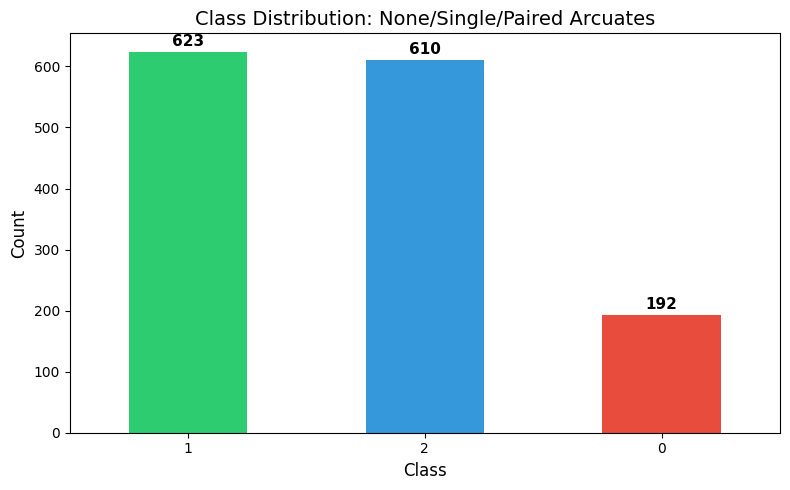


⚠️ Warning: Class imbalance detected! Smallest class is 13.5%
   Consider using class_weight='balanced' or stratified sampling.


In [128]:
# Check class distribution for the target variable
print("Class Distribution for 'None/Single/Paired':")
print("=" * 50)
print("\nAbsolute counts:")
print(df['None/Single/Paired'].value_counts())
print("\nPercentage distribution:")
print(df['None/Single/Paired'].value_counts(normalize=True).round(4) * 100)

# Visualize class distribution
fig, ax = plt.subplots(figsize=(8, 5))
df['None/Single/Paired'].value_counts().plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c'])
ax.set_title('Class Distribution: None/Single/Paired Arcuates', fontsize=14)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=0)
for i, v in enumerate(df['None/Single/Paired'].value_counts()):
    ax.text(i, v + 10, str(v), ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

# Check if there's significant imbalance
min_class_pct = df['None/Single/Paired'].value_counts(normalize=True).min() * 100
if min_class_pct < 15:
    print(f"\n⚠️ Warning: Class imbalance detected! Smallest class is {min_class_pct:.1f}%")
    print("   Consider using class_weight='balanced' or stratified sampling.")
else:
    print(f"\n✓ Classes are reasonably balanced (smallest class: {min_class_pct:.1f}%)")

In [129]:
# Import ML libraries for Model 1 (XGBoost)
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [130]:
# MODEL 1: Prepare data for predicting None/Single/Paired arcuates
# Define columns and drop rows with missing values
model1_cols = ['Age', 'Laterality', 'Barrett Integrated-K magnitude (D)', 'BIK_axis_cos', 
               'BIK_axis_sin', 'deltaTK_IOL700_cyl_atBIKaxis', 'Manifest_cyl_at_BIKaxis', 
               'Pentacam_cyl_atBIKaxis', '∆k IOL 700 magnitude (D)', 'None/Single/Paired']
model1_df = df[model1_cols].dropna()
print(f"Model 1 dataset size after dropping NaN: {len(model1_df)} samples (dropped {len(df) - len(model1_df)} rows)")

# Separate features and target
X1 = model1_df.drop(columns=['None/Single/Paired'])
y1 = model1_df['None/Single/Paired']

# Encode the target variable
label_encoder1 = LabelEncoder()
y1_encoded = label_encoder1.fit_transform(y1)
print(f"\nTarget classes: {label_encoder1.classes_}")
print(f"Encoded as: {dict(zip(label_encoder1.classes_, range(len(label_encoder1.classes_))))}")

# Encode categorical features for XGBoost (requires numeric)
X1['Laterality'] = X1['Laterality'].cat.codes
print(f"\nFeature columns: {list(X1.columns)}")

Model 1 dataset size after dropping NaN: 1416 samples (dropped 9 rows)

Target classes: [0 1 2]
Encoded as: {0: 0, 1: 1, 2: 2}

Feature columns: ['Age', 'Laterality', 'Barrett Integrated-K magnitude (D)', 'BIK_axis_cos', 'BIK_axis_sin', 'deltaTK_IOL700_cyl_atBIKaxis', 'Manifest_cyl_at_BIKaxis', 'Pentacam_cyl_atBIKaxis', '∆k IOL 700 magnitude (D)']


In [131]:
# MODEL 1: XGBoost Cross-Validation (Stratified 5-Fold)
print("=" * 70)
print("MODEL 1: XGBoost Cross-Validation (Predicting None/Single/Paired)")
print("=" * 70)

# Set up stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model
model1 = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)

# Calculate cross-validation scores
accuracy_scores = cross_val_score(model1, X1, y1_encoded, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(model1, X1, y1_encoded, cv=skf, scoring='f1_macro')

print(f"\nCross-Validation Results:")
print(f"  Accuracy: {accuracy_scores.mean():.4f} (+/- {accuracy_scores.std():.4f})")
print(f"  F1 Macro: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

MODEL 1: XGBoost Cross-Validation (Predicting None/Single/Paired)

Cross-Validation Results:
  Accuracy: 0.7161 (+/- 0.0203)
  F1 Macro: 0.6450 (+/- 0.0308)


In [132]:
# MODEL 1: Train/Test Split
print("=" * 70)
print("MODEL 1: Train/Test Split (80/20)")
print("=" * 70)

# Create stratified train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1_encoded, test_size=0.2, random_state=42, stratify=y1_encoded
)

print(f"Training set: {len(X1_train)} samples")
print(f"Test set: {len(X1_test)} samples")

MODEL 1: Train/Test Split (80/20)
Training set: 1132 samples
Test set: 284 samples


MODEL 1: Training XGBoost Classifier


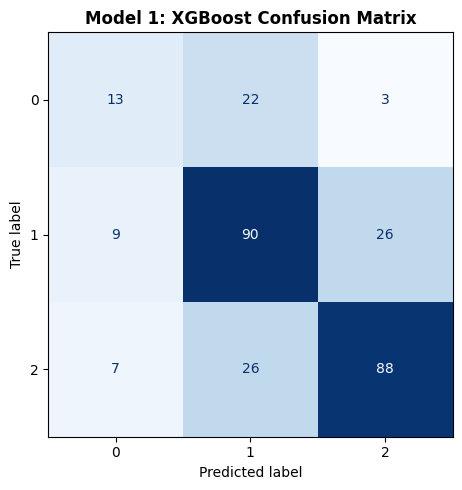


Model 1 training complete.


In [133]:
# MODEL 1: Train XGBoost and display confusion matrix
print("=" * 70)
print("MODEL 1: Training XGBoost Classifier")
print("=" * 70)

# Train the model
model1 = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)
model1.fit(X1_train, y1_train)

# Predict on test set
y1_pred = model1.predict(X1_test)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y1_test, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder1.classes_)
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.set_title('Model 1: XGBoost Confusion Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nModel 1 training complete.")

In [134]:
# MODEL 1: Classification Report
print("=" * 70)
print("MODEL 1: Classification Report - Test Set")
print("=" * 70)

# Convert class labels to strings for readability
target_names1 = ['None (0)', 'Single (1)', 'Paired (2)']
print(classification_report(y1_test, y1_pred, target_names=target_names1))

MODEL 1: Classification Report - Test Set
              precision    recall  f1-score   support

    None (0)       0.45      0.34      0.39        38
  Single (1)       0.65      0.72      0.68       125
  Paired (2)       0.75      0.73      0.74       121

    accuracy                           0.67       284
   macro avg       0.62      0.60      0.60       284
weighted avg       0.67      0.67      0.67       284



MODEL 1: Feature Importance


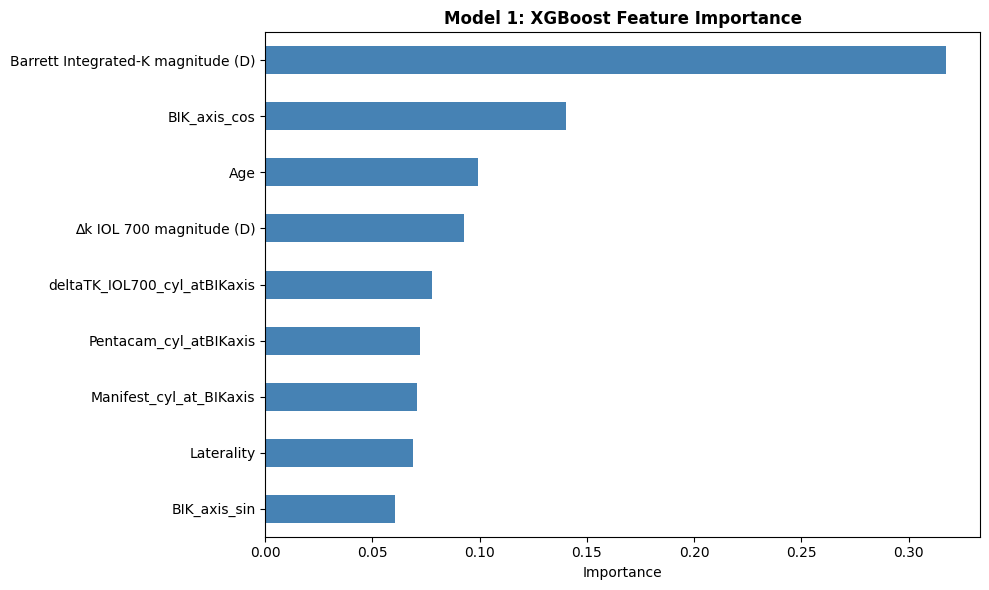


Feature Importance Ranking:
--------------------------------------------------
  Barrett Integrated-K magnitude (D): 0.3174
  BIK_axis_cos: 0.1404
  Age: 0.0991
  ∆k IOL 700 magnitude (D): 0.0926
  deltaTK_IOL700_cyl_atBIKaxis: 0.0779
  Pentacam_cyl_atBIKaxis: 0.0723
  Manifest_cyl_at_BIKaxis: 0.0709
  Laterality: 0.0688
  BIK_axis_sin: 0.0606


In [135]:
# MODEL 1: Feature Importance
print("=" * 70)
print("MODEL 1: Feature Importance")
print("=" * 70)

# Get feature importances
importances1 = model1.feature_importances_

# Create DataFrame for plotting
feat_imp_df1 = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': importances1
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
feat_imp_df1.plot(kind='barh', x='Feature', y='Importance', ax=ax, 
                  legend=False, color='steelblue')
ax.set_title('Model 1: XGBoost Feature Importance', fontsize=12, fontweight='bold')
ax.set_xlabel('Importance')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Print ranked features
print("\nFeature Importance Ranking:")
print("-" * 50)
for idx, row in feat_imp_df1.sort_values('Importance', ascending=False).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

In [ ]:
# MODEL 1: Permutation Importance Analysis (more robust than built-in importance)
from sklearn.inspection import permutation_importance

print("=" * 70)
print("MODEL 1: Permutation Importance Analysis")
print("=" * 70)
print("\nCalculating permutation importance (this may take a moment)...")

# Calculate permutation importance on test set
perm_importance1 = permutation_importance(model1, X1_test, y1_test, n_repeats=30, random_state=42, scoring='accuracy')

# Create DataFrame for permutation importance
perm_imp_df1 = pd.DataFrame({
    'Feature': X1.columns,
    'Importance_Mean': perm_importance1.importances_mean,
    'Importance_Std': perm_importance1.importances_std
}).sort_values('Importance_Mean', ascending=True)

# Plot permutation importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(perm_imp_df1['Feature'], perm_imp_df1['Importance_Mean'], 
        xerr=perm_imp_df1['Importance_Std'], color='steelblue', capsize=3)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7)
ax.set_title('Model 1: Permutation Importance\n(Mean decrease in accuracy when feature is shuffled)', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Mean Decrease in Accuracy')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Print ranked features with interpretation
print("\nPermutation Importance Ranking:")
print("-" * 70)
print(f"{'Feature':<45} {'Mean Δ Acc':>12} {'Std':>10}")
print("-" * 70)
for idx, row in perm_imp_df1.sort_values('Importance_Mean', ascending=False).iterrows():
    indicator = ""
    if row['Importance_Mean'] < 0:
        indicator = " ← potentially harmful"
    elif row['Importance_Mean'] < 0.005:
        indicator = " ← low importance"
    print(f"  {row['Feature']:<43} {row['Importance_Mean']:>10.4f}  {row['Importance_Std']:>8.4f}{indicator}")

In [ ]:
# MODEL 1: Feature Selection Analysis - Compare models with different feature subsets
print("=" * 70)
print("MODEL 1: Feature Selection Analysis")
print("=" * 70)
print("\nComparing full model vs reduced models (dropping low-importance features)...")

# Get features sorted by permutation importance
sorted_features1 = perm_imp_df1.sort_values('Importance_Mean', ascending=False)['Feature'].tolist()

# Store results
selection_results1 = []

# Test dropping features one by one (starting from lowest importance)
for n_drop in range(len(sorted_features1)):
    if n_drop == 0:
        features_to_use = sorted_features1
        dropped_str = "None"
    else:
        features_to_use = sorted_features1[:-n_drop]
        dropped_str = ", ".join(sorted_features1[-n_drop:])
    
    # Train model with selected features
    X1_train_sub = X1_train[features_to_use]
    X1_test_sub = X1_test[features_to_use]
    
    model_temp = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, 
                                eval_metric='mlogloss', verbosity=0)
    model_temp.fit(X1_train_sub, y1_train)
    y_pred_temp = model_temp.predict(X1_test_sub)
    
    from sklearn.metrics import accuracy_score, f1_score
    acc_temp = accuracy_score(y1_test, y_pred_temp)
    f1_temp = f1_score(y1_test, y_pred_temp, average='macro')
    
    selection_results1.append({
        'n_features': len(features_to_use),
        'features_dropped': dropped_str,
        'Accuracy': acc_temp,
        'F1_Macro': f1_temp
    })

# Create results DataFrame
selection_df1 = pd.DataFrame(selection_results1)

# Display results
print("\nFeature Selection Results:")
print("-" * 90)
print(f"{'# Features':<12} {'Accuracy':>10} {'F1 Macro':>10}   Features Dropped")
print("-" * 90)
for _, row in selection_df1.iterrows():
    print(f"{row['n_features']:<12} {row['Accuracy']:>10.4f} {row['F1_Macro']:>10.4f}   {row['features_dropped']}")

# Find optimal number of features
best_idx1 = selection_df1['F1_Macro'].idxmax()
print(f"\n✓ Best model uses {selection_df1.loc[best_idx1, 'n_features']} features")
print(f"  Accuracy: {selection_df1.loc[best_idx1, 'Accuracy']:.4f}, F1 Macro: {selection_df1.loc[best_idx1, 'F1_Macro']:.4f}")
if selection_df1.loc[best_idx1, 'n_features'] < len(sorted_features1):
    print(f"  Dropped features: {selection_df1.loc[best_idx1, 'features_dropped']}")

In [ ]:
# MODEL 1: Visualize feature selection results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy and F1 vs number of features
ax1 = axes[0]
ax1.plot(selection_df1['n_features'], selection_df1['Accuracy'], 'o-', color='steelblue', linewidth=2, markersize=8, label='Accuracy')
ax1.plot(selection_df1['n_features'], selection_df1['F1_Macro'], 's-', color='darkorange', linewidth=2, markersize=8, label='F1 Macro')
best_n1 = selection_df1.loc[selection_df1['F1_Macro'].idxmax(), 'n_features']
ax1.axvline(x=best_n1, color='red', linestyle='--', alpha=0.7, label=f'Optimal: {best_n1} features')
ax1.set_xlabel('Number of Features', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Model 1: Performance vs Number of Features', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(selection_df1['n_features'])

# Plot feature correlation heatmap
ax2 = axes[1]
corr_matrix1 = X1.corr()
im = ax2.imshow(corr_matrix1, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax2.set_xticks(range(len(X1.columns)))
ax2.set_yticks(range(len(X1.columns)))
ax2.set_xticklabels(X1.columns, rotation=45, ha='right', fontsize=8)
ax2.set_yticklabels(X1.columns, fontsize=8)
ax2.set_title('Model 1: Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax2, shrink=0.8)

# Add correlation values
for i in range(len(X1.columns)):
    for j in range(len(X1.columns)):
        val = corr_matrix1.iloc[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        ax2.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=6, color=color)

plt.tight_layout()
plt.show()

# Summary recommendation
print("\n" + "=" * 70)
print("MODEL 1: Feature Selection Recommendation")
print("=" * 70)
full_f1 = selection_df1[selection_df1['n_features'] == len(sorted_features1)]['F1_Macro'].values[0]
best_f1 = selection_df1['F1_Macro'].max()
if best_n1 < len(sorted_features1):
    improvement = (best_f1 - full_f1) * 100
    print(f"\n💡 Consider using {best_n1} features instead of {len(sorted_features1)}")
    print(f"   F1 Macro improves from {full_f1:.4f} to {best_f1:.4f} ({improvement:+.2f}%)")
    features_to_drop1 = sorted_features1[best_n1:]
    print(f"   Features to drop: {', '.join(features_to_drop1)}")
else:
    print(f"\n✓ All {len(sorted_features1)} features contribute to model performance")
    print(f"   No features recommended for removal")

In [136]:
# MODEL 2: Predict LRI length for SINGLE arcuate cases only
# Target: LRI length (from either 'LRI length 1' or 'LRI length 2', whichever is non-zero)

print("=" * 70)
print("MODEL 2: Single Arcuate LRI Length Prediction")
print("=" * 70)

# Filter for single arcuate cases only (None/Single/Paired = 1)
df_single = df[df['None/Single/Paired'] == 1].copy()
print(f"\nFiltered to single arcuate cases: {len(df_single)} samples")

# Create target variable: take whichever LRI length is non-zero
def get_single_lri_length(row):
    if row['LRI length 1'] != 0:
        return row['LRI length 1']
    elif row['LRI length 2'] != 0:
        return row['LRI length 2']
    else:
        print(f"⚠️ WARNING: No arcuate performed for single case at index {row.name} (LRI length 1 = {row['LRI length 1']}, LRI length 2 = {row['LRI length 2']})")
        return np.nan

df_single['LRI_length_target'] = df_single.apply(get_single_lri_length, axis=1)

# Check target distribution
print("\nLRI Length Target Distribution:")
print(df_single['LRI_length_target'].value_counts().sort_index())
print(f"\nMean LRI length: {df_single['LRI_length_target'].mean():.2f}")
print(f"Std LRI length: {df_single['LRI_length_target'].std():.2f}")

MODEL 2: Single Arcuate LRI Length Prediction

Filtered to single arcuate cases: 623 samples

LRI Length Target Distribution:
LRI_length_target
15      1
18      1
20     44
21     12
22     30
23     35
24     25
25     24
26     17
27     27
28     40
29     30
30    107
31      6
32     49
33     12
34      8
35     64
36     18
37     19
38     17
39      1
40     16
45     20
Name: count, dtype: int64

Mean LRI length: 29.60
Std LRI length: 6.00


In [137]:
# MODEL 2: Prepare features and target
# Features: Age, Laterality, Barrett Integrated-K magnitude, BIK_axis_cos, BIK_axis_sin,
#           deltaK_IOL700_cyl_atBIKaxis, deltaTK_IOL700_cyl_atBIKaxis, 
#           Manifest_cyl_at_BIKaxis, PostAstig_IOL700_cyl_atBIKaxis, Pentacam_cyl_atBIKaxis

model2_feature_cols = [
    'Age', 
    'Laterality', 
    'Barrett Integrated-K magnitude (D)', 
    'BIK_axis_cos', 
    'BIK_axis_sin', 
    'deltaK_IOL700_cyl_atBIKaxis', 
    'deltaTK_IOL700_cyl_atBIKaxis', 
    'Manifest_cyl_at_BIKaxis', 
    'PostAstig_IOL700_cyl_atBIKaxis',
    'Pentacam_cyl_atBIKaxis'
]

model2_cols = model2_feature_cols + ['LRI_length_target']
model2_df = df_single[model2_cols].dropna()
print(f"Model 2 dataset size after dropping NaN: {len(model2_df)} samples (dropped {len(df_single) - len(model2_df)} rows)")

# Separate features and target
X2 = model2_df.drop(columns=['LRI_length_target'])
y2 = model2_df['LRI_length_target']

# Encode categorical features for XGBoost (requires numeric)
X2 = X2.copy()
X2['Laterality'] = X2['Laterality'].cat.codes

print(f"\nFeature columns: {list(X2.columns)}")
print(f"Target: LRI_length_target (continuous)")
print(f"\nFeature statistics:")
X2.describe().round(3)

Model 2 dataset size after dropping NaN: 620 samples (dropped 3 rows)

Feature columns: ['Age', 'Laterality', 'Barrett Integrated-K magnitude (D)', 'BIK_axis_cos', 'BIK_axis_sin', 'deltaK_IOL700_cyl_atBIKaxis', 'deltaTK_IOL700_cyl_atBIKaxis', 'Manifest_cyl_at_BIKaxis', 'PostAstig_IOL700_cyl_atBIKaxis', 'Pentacam_cyl_atBIKaxis']
Target: LRI_length_target (continuous)

Feature statistics:


,Age,Laterality,Barrett Integrated-K magnitude (D),BIK_axis_cos,BIK_axis_sin,deltaK_IOL700_cyl_atBIKaxis,deltaTK_IOL700_cyl_atBIKaxis,Manifest_cyl_at_BIKaxis,PostAstig_IOL700_cyl_atBIKaxis,Pentacam_cyl_atBIKaxis
count,620.000,620.000,620.000,620.000,620.000,620.000,620.000,620.000,620.000,620.000
mean,64.800,0.506,0.419,-0.390,0.030,0.401,0.302,0.041,-0.047,0.415
std,8.404,0.500,0.226,0.656,0.647,0.269,0.316,0.508,0.243,0.304
min,33.000,0.000,0.000,-1.000,-1.000,-0.845,-1.011,-1.696,-0.667,-0.559
25%,59.000,0.000,0.250,-0.951,-0.559,0.223,0.106,-0.229,-0.248,0.197
50%,67.000,1.000,0.400,-0.695,0.035,0.384,0.296,0.000,-0.051,0.398
75%,70.250,1.000,0.550,0.070,0.643,0.567,0.520,0.321,0.151,0.599
max,86.000,1.000,1.200,1.000,1.000,1.289,1.172,2.629,0.580,1.699


In [138]:
# MODEL 2: Import regression libraries and perform cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

print("=" * 70)
print("MODEL 2: XGBoost Cross-Validation (Single Arcuate LRI Length)")
print("=" * 70)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost regressor
model2 = XGBRegressor(
    n_estimators=100,
    random_state=42,
    verbosity=0
)

# Calculate cross-validation scores
r2_scores = cross_val_score(model2, X2, y2, cv=kf, scoring='r2')
neg_mse_scores = cross_val_score(model2, X2, y2, cv=kf, scoring='neg_mean_squared_error')
neg_mae_scores = cross_val_score(model2, X2, y2, cv=kf, scoring='neg_mean_absolute_error')

print(f"\nCross-Validation Results (5-Fold):")
print(f"  R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")
print(f"  RMSE: {np.sqrt(-neg_mse_scores.mean()):.4f} (+/- {np.sqrt(neg_mse_scores.std()):.4f})")
print(f"  MAE: {-neg_mae_scores.mean():.4f} (+/- {neg_mae_scores.std():.4f})")

MODEL 2: XGBoost Cross-Validation (Single Arcuate LRI Length)

Cross-Validation Results (5-Fold):
  R² Score: 0.1496 (+/- 0.1327)
  RMSE: 5.4571 (+/- 1.5513)
  MAE: 4.2290 (+/- 0.1611)


In [139]:
# MODEL 2: Train/Test Split
print("=" * 70)
print("MODEL 2: Train/Test Split (80/20)")
print("=" * 70)

# Create train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

print(f"Training set: {len(X2_train)} samples")
print(f"Test set: {len(X2_test)} samples")

MODEL 2: Train/Test Split (80/20)
Training set: 496 samples
Test set: 124 samples


MODEL 2: Training XGBoost Regressor

Test Set Performance:
  R² Score: 0.1630
  RMSE: 5.5442
  MAE: 4.1796


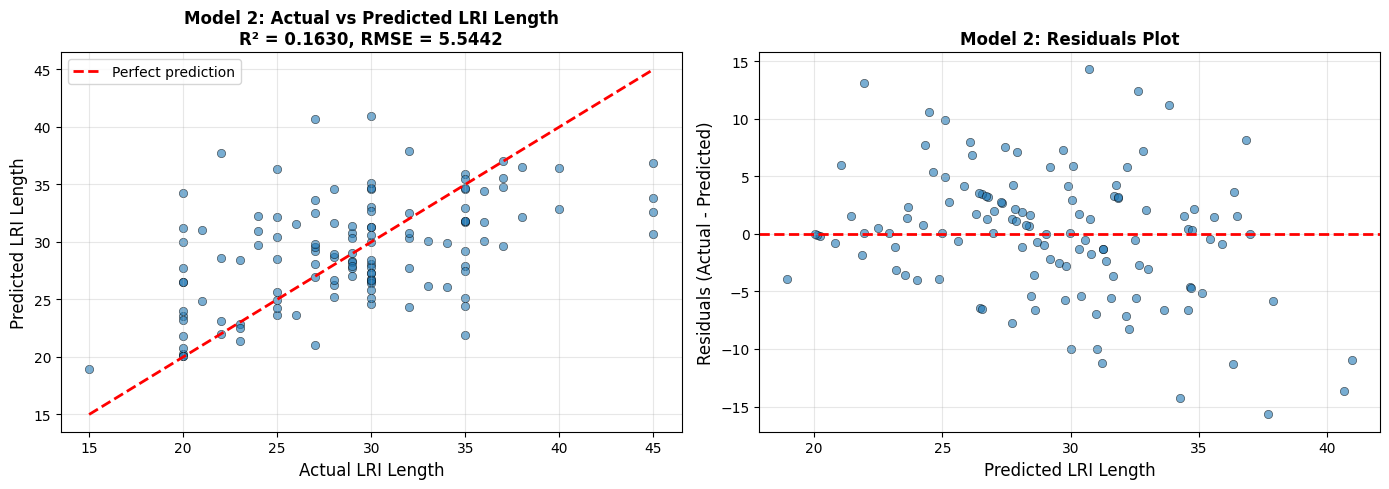

In [140]:
# MODEL 2: Train XGBoost and evaluate
print("=" * 70)
print("MODEL 2: Training XGBoost Regressor")
print("=" * 70)

# Train the model
model2 = XGBRegressor(
    n_estimators=100,
    random_state=42,
    verbosity=0
)
model2.fit(X2_train, y2_train)

# Predict on test set
y2_pred = model2.predict(X2_test)

# Calculate metrics
r2 = r2_score(y2_test, y2_pred)
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae = mean_absolute_error(y2_test, y2_pred)

print(f"\nTest Set Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
ax1 = axes[0]
ax1.scatter(y2_test, y2_pred, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2, label='Perfect prediction')
ax1.set_xlabel('Actual LRI Length', fontsize=12)
ax1.set_ylabel('Predicted LRI Length', fontsize=12)
ax1.set_title(f'Model 2: Actual vs Predicted LRI Length\nR² = {r2:.4f}, RMSE = {rmse:.4f}', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residuals plot
ax2 = axes[1]
residuals = y2_test - y2_pred
ax2.scatter(y2_pred, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted LRI Length', fontsize=12)
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax2.set_title('Model 2: Residuals Plot', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

MODEL 2: Feature Importance Analysis


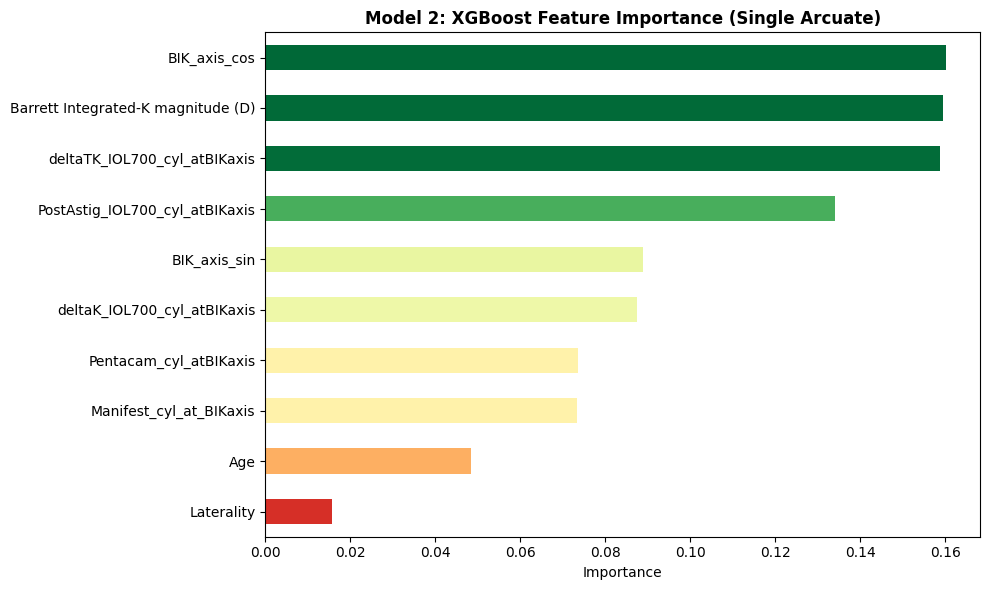


Feature Importance Ranking:
--------------------------------------------------
  BIK_axis_cos: 0.1602 (16.0%)
  Barrett Integrated-K magnitude (D): 0.1595 (16.0%)
  deltaTK_IOL700_cyl_atBIKaxis: 0.1588 (15.9%)
  PostAstig_IOL700_cyl_atBIKaxis: 0.1341 (13.4%)
  BIK_axis_sin: 0.0888 (8.9%)
  deltaK_IOL700_cyl_atBIKaxis: 0.0874 (8.7%)
  Pentacam_cyl_atBIKaxis: 0.0736 (7.4%)
  Manifest_cyl_at_BIKaxis: 0.0733 (7.3%)
  Age: 0.0485 (4.9%)
  Laterality: 0.0158 (1.6%)


In [141]:
# MODEL 2: Feature Importance Analysis
print("=" * 70)
print("MODEL 2: Feature Importance Analysis")
print("=" * 70)

# Get feature importances
importances2 = model2.feature_importances_

# Create DataFrame for plotting
feat_imp_df2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': importances2
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.RdYlGn(feat_imp_df2['Importance'] / feat_imp_df2['Importance'].max())
feat_imp_df2.plot(kind='barh', x='Feature', y='Importance', ax=ax, 
                  legend=False, color=colors)
ax.set_title('Model 2: XGBoost Feature Importance (Single Arcuate)', fontsize=12, fontweight='bold')
ax.set_xlabel('Importance')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Print ranked features
print("\nFeature Importance Ranking:")
print("-" * 50)
for idx, row in feat_imp_df2.sort_values('Importance', ascending=False).iterrows():
    importance_pct = row['Importance'] * 100
    print(f"  {row['Feature']}: {row['Importance']:.4f} ({importance_pct:.1f}%)")

MODEL 2: Permutation Importance Analysis

Calculating permutation importance (this may take a moment)...


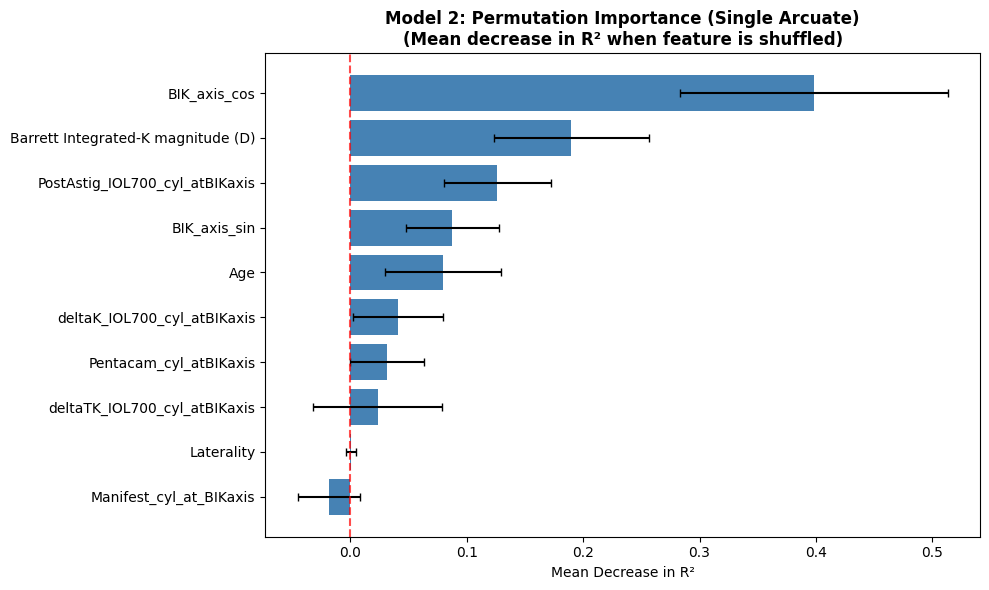


Permutation Importance Ranking:
----------------------------------------------------------------------
Feature                                          Mean Δ R²        Std
----------------------------------------------------------------------
  BIK_axis_cos                                    0.3983    0.1148
  Barrett Integrated-K magnitude (D)              0.1898    0.0665
  PostAstig_IOL700_cyl_atBIKaxis                  0.1262    0.0461
  BIK_axis_sin                                    0.0876    0.0398
  Age                                             0.0795    0.0497
  deltaK_IOL700_cyl_atBIKaxis                     0.0410    0.0388
  Pentacam_cyl_atBIKaxis                          0.0318    0.0317
  deltaTK_IOL700_cyl_atBIKaxis                    0.0234    0.0557
  Laterality                                      0.0005    0.0046 ← low importance
  Manifest_cyl_at_BIKaxis                        -0.0185    0.0267 ← potentially harmful


In [142]:
# MODEL 2: Permutation Importance Analysis (more robust than built-in importance)
from sklearn.inspection import permutation_importance

print("=" * 70)
print("MODEL 2: Permutation Importance Analysis")
print("=" * 70)
print("\nCalculating permutation importance (this may take a moment)...")

# Calculate permutation importance on test set
perm_importance = permutation_importance(model2, X2_test, y2_test, n_repeats=30, random_state=42)

# Create DataFrame for permutation importance
perm_imp_df = pd.DataFrame({
    'Feature': X2.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=True)

# Plot permutation importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(perm_imp_df['Feature'], perm_imp_df['Importance_Mean'], 
        xerr=perm_imp_df['Importance_Std'], color='steelblue', capsize=3)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7)
ax.set_title('Model 2: Permutation Importance (Single Arcuate)\n(Mean decrease in R² when feature is shuffled)', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Mean Decrease in R²')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Print ranked features with interpretation
print("\nPermutation Importance Ranking:")
print("-" * 70)
print(f"{'Feature':<45} {'Mean Δ R²':>12} {'Std':>10}")
print("-" * 70)
for idx, row in perm_imp_df.sort_values('Importance_Mean', ascending=False).iterrows():
    indicator = ""
    if row['Importance_Mean'] < 0:
        indicator = " ← potentially harmful"
    elif row['Importance_Mean'] < 0.005:
        indicator = " ← low importance"
    print(f"  {row['Feature']:<43} {row['Importance_Mean']:>10.4f}  {row['Importance_Std']:>8.4f}{indicator}")

In [143]:
# MODEL 2: Feature Selection Analysis - Compare models with different feature subsets
print("=" * 70)
print("MODEL 2: Feature Selection Analysis")
print("=" * 70)
print("\nComparing full model vs reduced models (dropping low-importance features)...")

# Get features sorted by permutation importance
sorted_features = perm_imp_df.sort_values('Importance_Mean', ascending=False)['Feature'].tolist()

# Store results
selection_results = []

# Test dropping features one by one (starting from lowest importance)
for n_drop in range(len(sorted_features)):
    if n_drop == 0:
        features_to_use = sorted_features
        dropped_str = "None"
    else:
        features_to_use = sorted_features[:-n_drop]
        dropped_str = ", ".join(sorted_features[-n_drop:])
    
    # Train model with selected features
    X2_train_sub = X2_train[features_to_use]
    X2_test_sub = X2_test[features_to_use]
    
    model_temp = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    model_temp.fit(X2_train_sub, y2_train)
    y_pred_temp = model_temp.predict(X2_test_sub)
    
    r2_temp = r2_score(y2_test, y_pred_temp)
    rmse_temp = np.sqrt(mean_squared_error(y2_test, y_pred_temp))
    mae_temp = mean_absolute_error(y2_test, y_pred_temp)
    
    selection_results.append({
        'n_features': len(features_to_use),
        'features_kept': len(features_to_use),
        'features_dropped': dropped_str,
        'R2': r2_temp,
        'RMSE': rmse_temp,
        'MAE': mae_temp
    })

# Create results DataFrame
selection_df = pd.DataFrame(selection_results)

# Display results
print("\nFeature Selection Results:")
print("-" * 90)
print(f"{'# Features':<12} {'R²':>10} {'RMSE':>10} {'MAE':>10}   Features Dropped")
print("-" * 90)
for _, row in selection_df.iterrows():
    print(f"{row['n_features']:<12} {row['R2']:>10.4f} {row['RMSE']:>10.4f} {row['MAE']:>10.4f}   {row['features_dropped']}")

# Find optimal number of features
best_idx = selection_df['R2'].idxmax()
print(f"\n✓ Best model uses {selection_df.loc[best_idx, 'n_features']} features with R² = {selection_df.loc[best_idx, 'R2']:.4f}")
if selection_df.loc[best_idx, 'n_features'] < len(sorted_features):
    print(f"  Dropped features: {selection_df.loc[best_idx, 'features_dropped']}")

MODEL 2: Feature Selection Analysis

Comparing full model vs reduced models (dropping low-importance features)...

Feature Selection Results:
------------------------------------------------------------------------------------------
# Features           R²       RMSE        MAE   Features Dropped
------------------------------------------------------------------------------------------
10               0.1790     5.4910     4.1034   None
9                0.2130     5.3761     4.0859   Manifest_cyl_at_BIKaxis
8                0.2395     5.2848     3.9720   Laterality, Manifest_cyl_at_BIKaxis
7                0.2922     5.0984     3.9007   deltaTK_IOL700_cyl_atBIKaxis, Laterality, Manifest_cyl_at_BIKaxis
6                0.2283     5.3233     4.0842   Pentacam_cyl_atBIKaxis, deltaTK_IOL700_cyl_atBIKaxis, Laterality, Manifest_cyl_at_BIKaxis
5                0.2144     5.3711     4.1079   deltaK_IOL700_cyl_atBIKaxis, Pentacam_cyl_atBIKaxis, deltaTK_IOL700_cyl_atBIKaxis, Laterality, Manifes

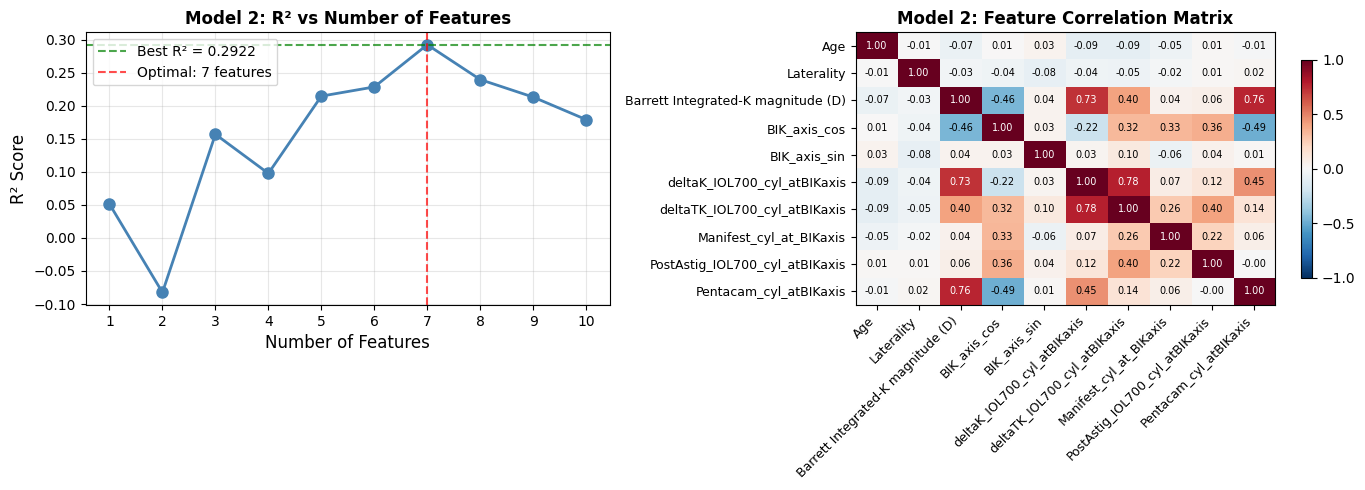


Highly Correlated Feature Pairs (|r| > 0.7):
--------------------------------------------------
  Barrett Integrated-K magnitude (D) ↔ deltaK_IOL700_cyl_atBIKaxis: r = 0.725
  Barrett Integrated-K magnitude (D) ↔ Pentacam_cyl_atBIKaxis: r = 0.759
  deltaK_IOL700_cyl_atBIKaxis ↔ deltaTK_IOL700_cyl_atBIKaxis: r = 0.776


In [144]:
# MODEL 2: Visualize feature selection results and correlation analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot R² vs number of features
ax1 = axes[0]
ax1.plot(selection_df['n_features'], selection_df['R2'], 'o-', color='steelblue', linewidth=2, markersize=8)
ax1.axhline(y=selection_df['R2'].max(), color='green', linestyle='--', alpha=0.7, label=f'Best R² = {selection_df["R2"].max():.4f}')
best_n = selection_df.loc[selection_df['R2'].idxmax(), 'n_features']
ax1.axvline(x=best_n, color='red', linestyle='--', alpha=0.7, label=f'Optimal: {best_n} features')
ax1.set_xlabel('Number of Features', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Model 2: R² vs Number of Features', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(selection_df['n_features'])

# Plot feature correlation heatmap
ax2 = axes[1]
corr_matrix = X2.corr()
im = ax2.imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax2.set_xticks(range(len(X2.columns)))
ax2.set_yticks(range(len(X2.columns)))
ax2.set_xticklabels(X2.columns, rotation=45, ha='right', fontsize=9)
ax2.set_yticklabels(X2.columns, fontsize=9)
ax2.set_title('Model 2: Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax2, shrink=0.8)

# Add correlation values
for i in range(len(X2.columns)):
    for j in range(len(X2.columns)):
        val = corr_matrix.iloc[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        ax2.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=7, color=color)

plt.tight_layout()
plt.show()

# Check for high correlations that might indicate redundancy
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
print("-" * 50)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: r = {corr_matrix.iloc[i, j]:.3f}")
            
if not high_corr_pairs:
    print("  No highly correlated pairs found (all |r| ≤ 0.7)")

In [145]:
# MODEL 2: Summary and Recommendations
print("=" * 70)
print("MODEL 2: SUMMARY - Single Arcuate LRI Length Prediction")
print("=" * 70)

print("\n📊 Dataset:")
print(f"   • Single arcuate cases: {len(df_single)} samples")
print(f"   • After dropping NaN: {len(model2_df)} samples")

print("\n🎯 Target Variable:")
print(f"   • LRI length (degrees)")
print(f"   • Mean: {y2.mean():.2f}, Std: {y2.std():.2f}")
print(f"   • Range: {y2.min():.0f} - {y2.max():.0f}")

print("\n📈 Model Performance (Test Set):")
print(f"   • R² Score: {r2:.4f}")
print(f"   • RMSE: {rmse:.4f}")
print(f"   • MAE: {mae:.4f}")

print("\n🔍 Feature Importance Summary:")
print("   Top 3 features by permutation importance:")
top3 = perm_imp_df.sort_values('Importance_Mean', ascending=False).head(3)
for i, (_, row) in enumerate(top3.iterrows(), 1):
    print(f"   {i}. {row['Feature']}: {row['Importance_Mean']:.4f}")

print("\n💡 Feature Selection Recommendation:")
best_n = selection_df.loc[selection_df['R2'].idxmax(), 'n_features']
full_r2 = selection_df[selection_df['n_features'] == len(sorted_features)]['R2'].values[0]
best_r2 = selection_df['R2'].max()
if best_n < len(sorted_features):
    print(f"   • Consider using {best_n} features instead of {len(sorted_features)}")
    print(f"   • R² improves from {full_r2:.4f} to {best_r2:.4f}")
    features_to_drop = sorted_features[best_n:]
    print(f"   • Features to drop: {', '.join(features_to_drop)}")
else:
    print(f"   • All {len(sorted_features)} features contribute to model performance")
    print(f"   • No features recommended for removal")

MODEL 2: SUMMARY - Single Arcuate LRI Length Prediction

📊 Dataset:
   • Single arcuate cases: 623 samples
   • After dropping NaN: 620 samples

🎯 Target Variable:
   • LRI length (degrees)
   • Mean: 29.57, Std: 5.99
   • Range: 15 - 45

📈 Model Performance (Test Set):
   • R² Score: 0.1630
   • RMSE: 5.5442
   • MAE: 4.1796

🔍 Feature Importance Summary:
   Top 3 features by permutation importance:
   1. BIK_axis_cos: 0.3983
   2. Barrett Integrated-K magnitude (D): 0.1898
   3. PostAstig_IOL700_cyl_atBIKaxis: 0.1262

💡 Feature Selection Recommendation:
   • Consider using 7 features instead of 10
   • R² improves from 0.1790 to 0.2922
   • Features to drop: deltaTK_IOL700_cyl_atBIKaxis, Laterality, Manifest_cyl_at_BIKaxis


In [146]:
# Placeholder for future models